# Exponential Smooth to forecast

## Import Library

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finviz.screener import Screener
from typing import List, Dict
from sklearn import logger
from pyfinviz.quote import Quote
from pyfinviz.screener import Screener
from pyfinviz.insider import Insider
import re
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

## Import dataset

In [410]:
# period is three years
end_date = datetime.today().date()

start_date = datetime(2020, 7, 19)
# start_date = end_date - relativedelta(years = 5)

df = yf.download(
  'NKTX',
  start = start_date,
  end = end_date
)


[*********************100%%**********************]  1 of 1 completed


In [411]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-20,36.610001,37.500000,35.599998,36.389999,36.389999,405707
2020-07-21,36.080002,37.500000,32.930000,33.599998,33.599998,137640
2020-07-22,33.779999,34.150002,30.700001,30.850000,30.850000,104267
2020-07-23,31.299999,31.870001,30.130100,30.350000,30.350000,63804
2020-07-24,31.240000,31.240000,28.299999,28.700001,28.700001,92867
2020-07-27,28.760000,29.305000,27.270000,27.690001,27.690001,167767
2020-07-28,28.070000,28.240000,26.900000,27.219999,27.219999,83192
2020-07-29,27.440001,28.200001,26.400000,26.459999,26.459999,98688
2020-07-30,26.580000,27.379999,26.500000,27.219999,27.219999,102534


### Draw open price for NKTX

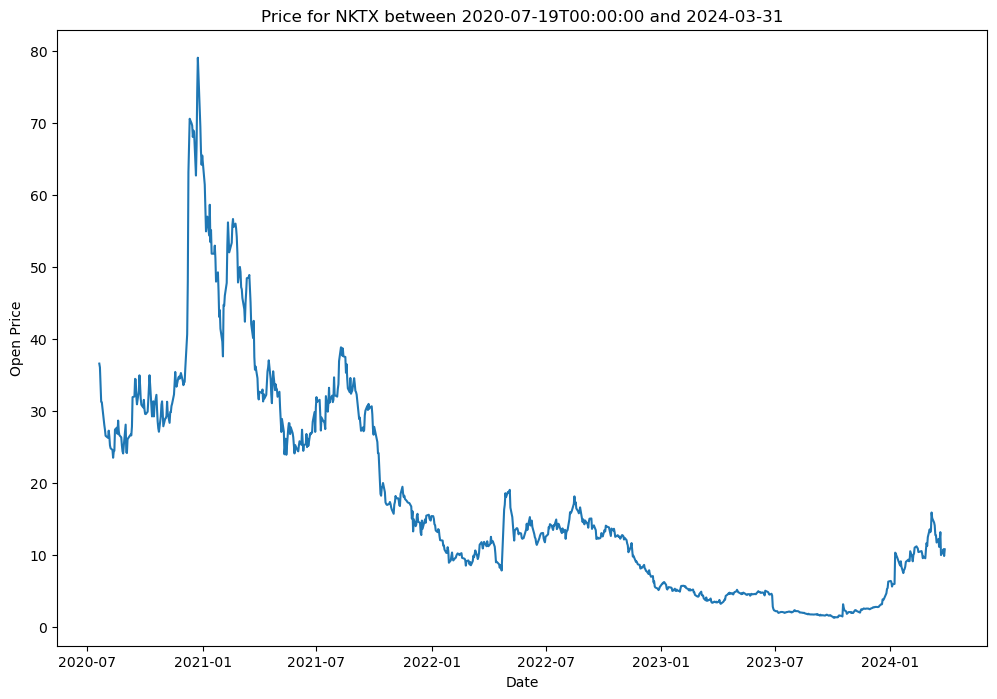

In [412]:
# plot grap of 'NKTX' open price for 5 years
fig, axes = plt.subplots(figsize = (12, 8))
plt.title('Price for NKTX between {} and {}'.format(start_date.isoformat(), end_date.isoformat()))
sns.lineplot(data = df, x = df.index,  y = 'Open')
# sns.lineplot(data = df, x = df.index, y = 'High')
# sns.lineplot(data = df, x = df.index, y = 'Low')
plt.ylabel('Open Price')
plt.show()

### Check autocorrelation 

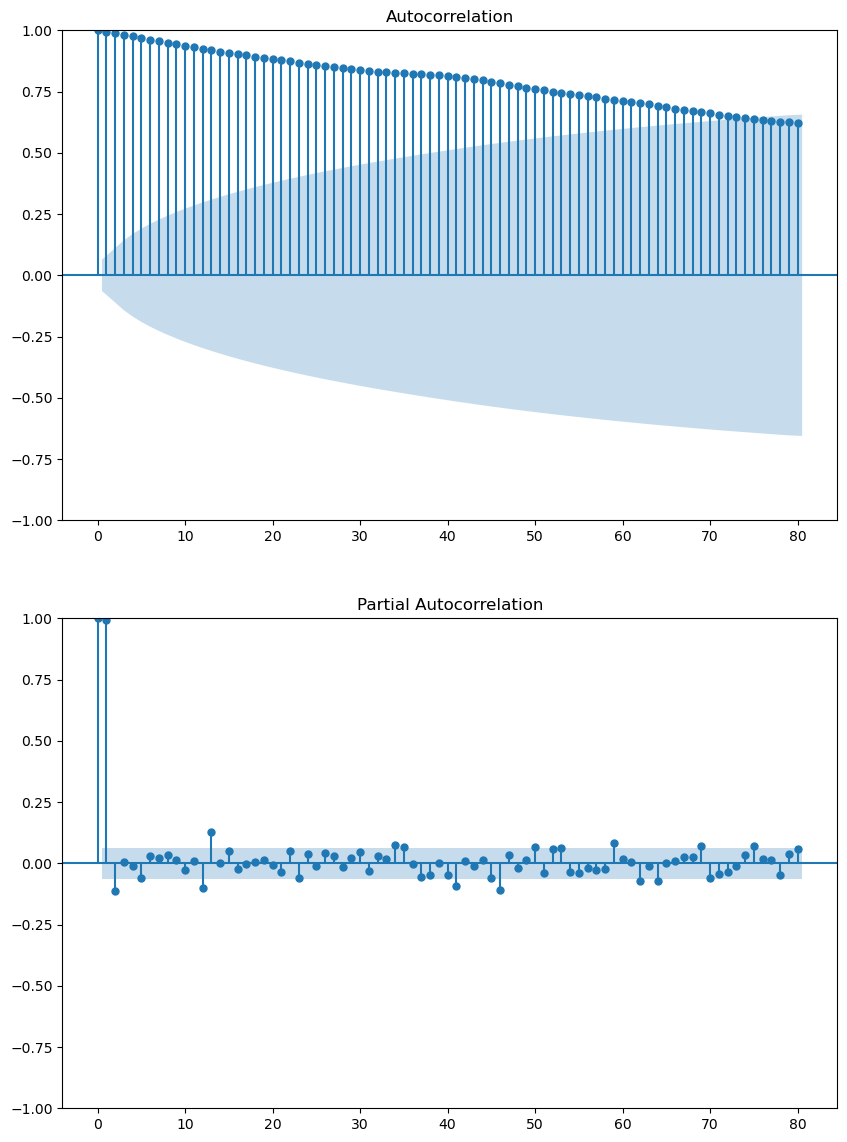

In [413]:
fig, axes = plt.subplots(2, 1, figsize = (10,14))
sm.graphics.tsa.plot_acf(df['Open'], lags = 80, ax= axes[0])  ## correlection of time series and time series which backward lag i 
sm.graphics.tsa.plot_pacf(df['Open'], lags = 80, ax= axes[1])  ## remove the inflence of the other time series between lags i 
plt.show()
# these graphs show that the correlation of time series with itself at lags of up to 80, within the interval of 74 days(approximately), prices is correlated closely

## resample data to frequent to 5 days 

In [414]:
df2 = df.asfreq('5d')

In [415]:
# resample data to 5 business days 
df1 = df.reset_index().resample(rule = '5d', on = 'Date')['Open'].mean()
df1

Date
2020-07-20    33.802000
2020-07-25    28.090000
2020-07-30    26.456667
2020-08-04    25.967500
2020-08-09    24.255000
                ...    
2024-03-06    14.840000
2024-03-11    13.188000
2024-03-16    11.870000
2024-03-21    11.218333
2024-03-26    10.496667
Freq: 5D, Name: Open, Length: 270, dtype: float64

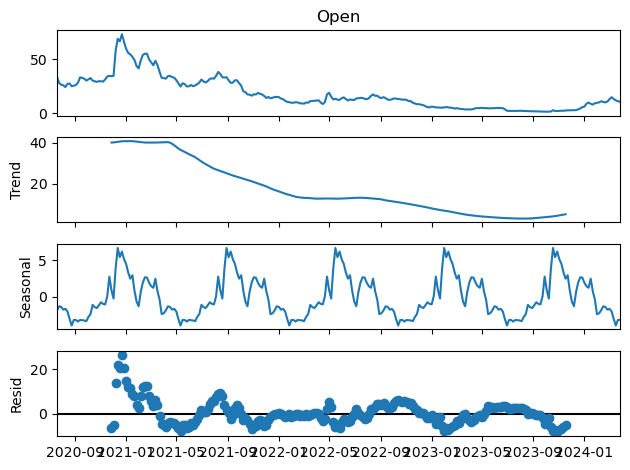

In [428]:
# check the seasonality and trend
res = seasonal_decompose(df1, model = 'additive', period = 52)
res.plot()
plt.show()

In [ ]:
#  check the stationality 
